In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# toy dataset

x_train = np.array ([[4.7], [2.4], [7.5], [7.1], [4.3], 
                     [7.8], [8.9], [5.2], [4.59], [2.1], 
                     [8], [5], [7.5], [5], [4],
                     [8], [5.2], [4.9], [3], [4.7], 
                     [4], [4.8], [3.5], [2.1], [4.1]],
                    dtype = np.float32)

y_train = np.array ([[2.6], [1.6], [3.09], [2.4], [2.4], 
                     [3.3], [2.6], [1.96], [3.13], [1.76], 
                     [3.2], [2.1], [1.6], [2.5], [2.2], 
                     [2.75], [2.4], [1.8], [1], [2], 
                     [1.6], [2.4], [2.6], [1.5], [3.1]], 
                    dtype = np.float32)

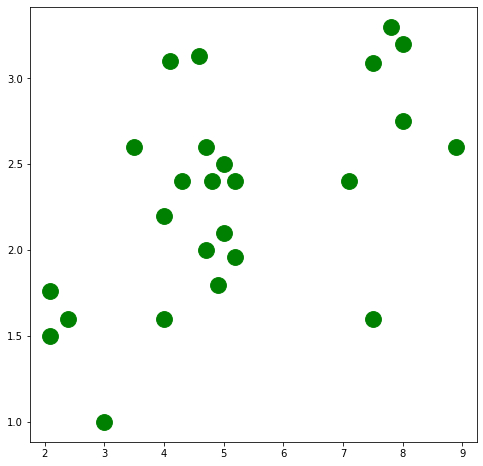

In [3]:
# visualizing the toy dataset
plt.figure(figsize=(8,8))
plt.scatter(x_train, y_train, c='green', s=250, label='Original data')
plt.show()

In [4]:
# Converting to torch tensors
x = torch.from_numpy(x_train)
y = torch.from_numpy(y_train)

In [5]:
x.size()

torch.Size([25, 1])

In [6]:
# details of our neural network
inp = 1
hidden = 5
out = 1

In [7]:
# defining the model
'''
Sequential because layers are applied in sequence to 
the 
input that we feed into this model
'''
model = torch.nn.Sequential(
            torch.nn.Linear(inp, hidden),
            torch.nn.ReLU(),
            torch.nn.Linear(hidden, out))

In [8]:
# calculating the loss of the model
loss_fn = torch.nn.MSELoss(reduction='sum')

In [9]:
# training the neural network

learning_rate = 1e-4

for i in range(500):
    # code here
    y_pred = model(x)
    
    loss = loss_fn(y_pred, y)
    print(i, loss.item())
    
    model.zero_grad()    # zero out the gradients for our model
    loss.backward()      # calculating fresh gradients
    
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

0 94.70057678222656
1 90.06449127197266
2 85.36812591552734
3 80.58987426757812
4 75.75106811523438
5 70.92662048339844
6 66.15032196044922
7 61.45816421508789
8 56.8870849609375
9 52.47343444824219
10 48.251556396484375
11 44.252323150634766
12 40.50182342529297
13 37.02042770385742
14 33.82206726074219
15 30.913984298706055
16 28.29684066772461
17 25.965166091918945
18 23.908151626586914
19 22.110591888427734
20 20.553977966308594
21 19.21759033203125
22 18.07953453063965
23 17.117652893066406
24 16.3102970123291
25 15.63688850402832
26 15.07834529876709
27 14.617338180541992
28 14.238411903381348
29 13.92799186706543
30 13.674324035644531
31 13.467360496520996
32 13.298589706420898
33 13.16089916229248
34 13.048362731933594
35 12.956103324890137
36 12.880125999450684
37 12.817173957824707
38 12.764618873596191
39 12.720333099365234
40 12.682619094848633
41 12.650105476379395
42 12.621713638305664
43 12.596576690673828
44 12.574006080627441
45 12.553465843200684
46 12.534525871276855

In [10]:
# prediction on our training data
predicted_in_tensor = model(x)
predicted_in_tensor

tensor([[2.0423],
        [1.2680],
        [2.9848],
        [2.8502],
        [1.9076],
        [3.0858],
        [3.4561],
        [2.2106],
        [2.0053],
        [1.1670],
        [3.1532],
        [2.1433],
        [2.9848],
        [2.1433],
        [1.8066],
        [3.1532],
        [2.2106],
        [2.1096],
        [1.4700],
        [2.0423],
        [1.8066],
        [2.0759],
        [1.6383],
        [1.1670],
        [1.8403]], grad_fn=<AddmmBackward0>)

In [11]:
predicted = predicted_in_tensor.detach().numpy()    # detaching the tensor from the computation graph
predicted

array([[2.0422812],
       [1.2680353],
       [2.9848416],
       [2.8501902],
       [1.9076298],
       [3.0858305],
       [3.4561217],
       [2.2105956],
       [2.0052521],
       [1.1670467],
       [3.153156 ],
       [2.14327  ],
       [2.9848416],
       [2.14327  ],
       [1.8066411],
       [3.153156 ],
       [2.2105956],
       [2.109607 ],
       [1.4700124],
       [2.0422812],
       [1.8066411],
       [2.0759442],
       [1.6383269],
       [1.1670467],
       [1.840304 ]], dtype=float32)

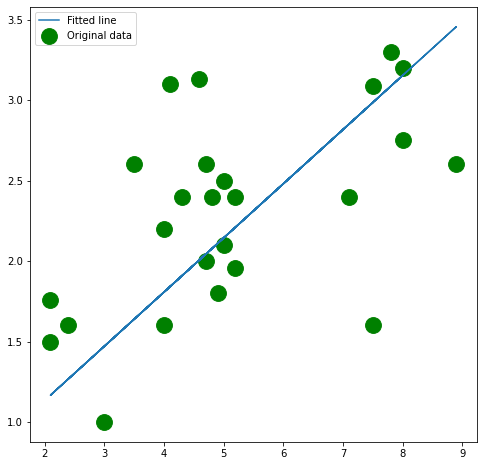

In [12]:
# visualization of the predicted output

plt.figure(figsize=(8, 8))
plt.scatter(x_train, y_train, c='green', s=250, label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

### Training the model using pytorch built-in optimizer

In [13]:
model = torch.nn.Sequential(
            torch.nn.Linear(inp, hidden),
            torch.nn.ReLU(),
            torch.nn.Linear(hidden, out))

loss_fn = torch.nn.MSELoss(reduction='sum')

In [14]:
# training the neural network

learning_rate = 1e-4
optimizer = torch.optim.SGD(model.parameters(), learning_rate)

for i in range(500):
    # code here
    y_pred = model(x)
    
    loss = loss_fn(y_pred, y)
    print(i, loss.item())
    
    optimizer.zero_grad()    # zero out the gradients for our model
    
    loss.backward()      # calculating fresh gradients
    
    optimizer.step()

0 281.8326721191406
1 223.43289184570312
2 179.96328735351562
3 146.21231079101562
4 119.30925750732422
5 97.55621337890625
6 79.87516784667969
7 65.5252914428711
8 53.96097946166992
9 44.7757568359375
10 37.51369857788086
11 31.844655990600586
12 27.484384536743164
13 24.172531127929688
14 21.68058967590332
15 19.825733184814453
16 18.4581356048584
17 17.45783805847168
18 16.730810165405273
19 16.204742431640625
20 15.824949264526367
21 15.550698280334473
22 15.352005958557129
23 15.207060813903809
24 15.100135803222656
25 15.019975662231445
26 14.958587646484375
27 14.910323143005371
28 14.871210098266602
29 14.83846664428711
30 14.810151100158691
31 14.784908294677734
32 14.761809349060059
33 14.740194320678711
34 14.71961784362793
35 14.699772834777832
36 14.680439949035645
37 14.661471366882324
38 14.642767906188965
39 14.624261856079102
40 14.605899810791016
41 14.58764934539795
42 14.569489479064941
43 14.55140495300293
44 14.533387184143066
45 14.515426635742188
46 14.497513771

410 10.007429122924805
411 9.999249458312988
412 9.991085052490234
413 9.982939720153809
414 9.97480583190918
415 9.966692924499512
416 9.958593368530273
417 9.950511932373047
418 9.942444801330566
419 9.934394836425781
420 9.926360130310059
421 9.918342590332031
422 9.910340309143066
423 9.90235424041748
424 9.894383430480957
425 9.886427879333496
426 9.878490447998047
427 9.870567321777344
428 9.862661361694336
429 9.854771614074707
430 9.846895217895508
431 9.839035987854004
432 9.831192016601562
433 9.8233642578125
434 9.815549850463867
435 9.807755470275879
436 9.799976348876953
437 9.792206764221191
438 9.784455299377441
439 9.776721954345703
440 9.769001960754395
441 9.761297225952148
442 9.753609657287598
443 9.745936393737793
444 9.738277435302734
445 9.730636596679688
446 9.723008155822754
447 9.7153959274292
448 9.707801818847656
449 9.700217247009277
450 9.69265079498291
451 9.685097694396973
452 9.677560806274414
453 9.670040130615234
454 9.662531852722168
455 9.6550388336

In [15]:
predicted_in_tensor = model(x)
predicted_in_tensor

tensor([[2.0225],
        [1.2202],
        [2.9992],
        [2.8596],
        [1.8830],
        [3.1038],
        [3.4875],
        [2.1969],
        [1.9841],
        [1.0938],
        [3.1736],
        [2.1271],
        [2.9992],
        [2.1271],
        [1.7783],
        [3.1736],
        [2.1969],
        [2.0923],
        [1.4295],
        [2.0225],
        [1.7783],
        [2.0574],
        [1.6039],
        [1.0938],
        [1.8132]], grad_fn=<AddmmBackward0>)

In [16]:
predicted = predicted_in_tensor.detach().numpy()    # detaching the tensor from the computation graph
predicted

array([[2.022492 ],
       [1.2202362],
       [2.9991515],
       [2.8596287],
       [1.8829694],
       [3.1037936],
       [3.487481 ],
       [2.1968956],
       [1.9841233],
       [1.0937564],
       [3.173555 ],
       [2.127134 ],
       [2.9991515],
       [2.127134 ],
       [1.7783272],
       [3.173555 ],
       [2.1968956],
       [2.0922534],
       [1.4295202],
       [2.022492 ],
       [1.7783272],
       [2.0573728],
       [1.6039238],
       [1.0937564],
       [1.8132079]], dtype=float32)

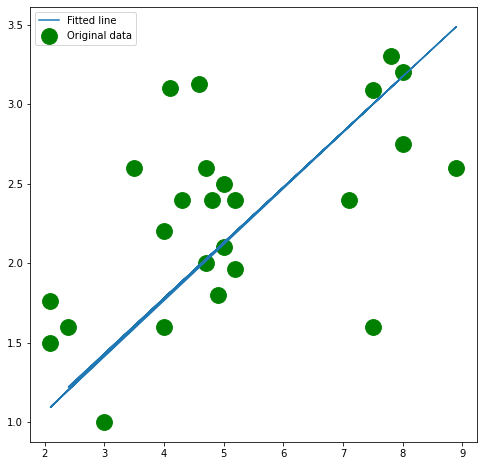

In [17]:
# visualization of the predicted output

plt.figure(figsize=(8, 8))
plt.scatter(x_train, y_train, c='green', s=250, label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()